# PROJECT ON PREDICTING CAR PRICES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

raw = pd.read_csv('imports-85.data', names = cols)
raw.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Mapping out the variables
- Price is the dependent variable (y) and the categorical variables would be all the continuous ones, that can be clearly seen from the [relevant UCI link]('https://archive.ics.uci.edu/ml/datasets/automobile')
- A needed action is also related to data cleaning, namely we must kill all Nans and normalize all values into a 0-1 scale.

In [3]:
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 
                   'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = raw[continuous_cols]

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [34]:
cars = cars.replace('?', np.nan)
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [6]:
cars.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

- Value imputation for all columns, included the target variable. We're doing it a bit rough, with averages for each column.

In [7]:
means = cars.astype(float).mean()
cars = cars.fillna(means)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


Time to normalize stuff with minmax scaling

In [30]:
#convert all dataframe to numeric values
cars = cars.astype(float)
#store the original price column
prices = cars['price']

#normalize dataframe with minmax scaling and reassign value to price col
def minmax_scaling(df):
    min_values = df.min()
    max_values = df.max()
    normalized_df = (df - min_values) / (max_values - min_values)
    return normalized_df

normalized_cars = minmax_scaling(cars)
normalized_cars = normalized_cars.dropna(axis = 0).reset_index(drop = True)
normalized_cars['price'] = prices
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


Let's plot the distribution of prices to understand the kind of dataset we have - which turns out to be pretty skewed. This will indeed bring consequences in 

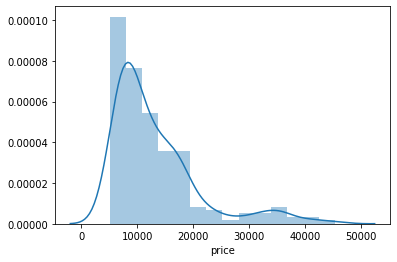

In [33]:
sns.distplot(normalized_cars['price'])
plt.show()

# Univariate model
A univariate model is a model where a single feature is used to predict a target variable.
Our aim here is to understand whether a K-Nearest neighbor Regressor is a good model to help us predict the price of the cars in this dataset - given the distribution across price ranges, we have a very skewed dataset, so we can expect the model to perform decently well where there is more data (that is, more neighbors) 

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

In [11]:
def knn_test_train_v1(df, train_col, target_col, neighbors = 5):
    #Prepare features matrix and target vector
    X = df[[train_col]]
    y = df[target_col]
    
    #define data to perform a classic train / test split on a classic 50% holdout.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    
    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    
    #Fit the model with the training matrix and target column y_train
    knn.fit(X_train, y_train)
    
    #predict the values on the remaining test matrix
    predicted_labels = knn.predict(X_test)
    
    # Calculate and return RMSE.
    mse = mean_squared_error(y_test, predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [12]:
knn_test_train_v1(train_col = 'horsepower', target_col = 'price', df = normalized_cars)

4225.857210752577

Results are not swinging too much, with a standard deviation of 320, which is about 5-10% of the calculated RMSEs values.
However, given the size of the dataset is rather small, we will try a more rigorous approach including cross-validation. The function will:
- Accept number of folds as an argument (we'll keep the defaul recommended value of 5)
- Calculate cross validation score (RMSE) and predict labels, using the two routines `cross_val_score` and `cross_val_predict`
- Return a dictionary with keys `['rmse', 'yhat]`, that report respectively:
    - A list of each fold RMSE
    - An array of predicted values, with the shape `[df.shape[0], 1]` (1 column, same number of rows as the input dataframe)


In [13]:
def knn_test_train_v2(df, train_col, target_col, neighbors = 5, folds = 5, w = 'uniform'):
    #Prepare features matrix and target vector
    X = df[train_col]
    y = df[target_col]
    
    #instantiate a number of folds for cross validation 
    kf = KFold(n_splits = folds, shuffle = True, random_state = 0)

    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors, weights = w)
    
    #Perform cross validation with the cross_val routine (that under the hood fits the model and predicts values)
    rmses = cross_val_score(knn, X, y, scoring = 'neg_root_mean_squared_error', cv = kf)
    r2 = cross_val_score(knn, X, y, scoring = 'r2', cv = kf)

    # cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation
    predicted_labels = cross_val_predict(knn, X, y, cv = kf)
    
    result = {}
    result['rmse'] = abs(rmses) #array of rmses equal to the number of folds
    result['r2'] = abs(r2) #array of r_squared equal to the number of folds
    result['yhat'] = predicted_labels
    #return dictionary of accessible results
    return result

In [14]:
#testing the function to ouput results for a univariate model based on horsepower and 5 neighbors to predict prices
test_hp_5n = knn_test_train_v2(train_col = ['horsepower'], target_col = 'price', df = normalized_cars, neighbors = 5)

#add a column to the main dataframe with the results
normalized_cars['yhat_hp'] = test_hp_5n['yhat']

for key in ['rmse', 'r2']:
    print(f'{key.upper()} calculated per fold: {test_hp_5n[key].round(2)}')
    print('Average', key, ':', test_hp_5n[key].mean().round(2), '\n')

RMSE calculated per fold: [4679.33 4443.93 2360.55 4584.49 4162.16]
Average rmse : 4046.09 

R2 calculated per fold: [0.68 0.43 0.93 0.66 0.72]
Average r2 : 0.68 



As expected, cross validation shows something interesting; not all folds are behaving the same way, reflecting the data imbalance we acknowledged in the first place. In light of this, we shall keep the cross-validation approach, so to get a more precise understanding of our model performance, rather than relying on how the dataset is divided by the `train_test_split` routine.

With this in mind, we shall understand two things:
- Which feature (for now we have just used horsepower) can be the best to predict prices?
- Which is the optimal value of neighbors? Should we go for 5, less, or more?

Let us try to make a comparison across the board by testing the model on all single variables and by checking the most performing feature (the one that delivers the lowest rmses).

In [15]:
k_neighbors = [1,3,5,7,9]
labels = '1_neighbor 3_neighbor 5_neighbor 7_neighbor 9_neighbor'.split()
features = continuous_cols[:-1] #to exclude price

errors = [
    [round(knn_test_train_v2(train_col = [f], target_col = 'price', df = normalized_cars, neighbors = k, folds = 5)['rmse'].mean(),2) 
     for f in features] #this list comprehension generates the RMSES for each single feature (calculated as means of the k-folds)
    for k in k_neighbors #and repeats the operation for 5 different neighbors-size cases
]
data = pd.DataFrame(data = errors, columns = features, index = labels)#k_neighbors)
data


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1_neighbor,7957.21,3984.53,4968.95,5328.84,8226.42,5206.42,3861.61,6891.15,8976.85,7611.27,4614.06,7480.77,6158.90,4786.52
3_neighbor,7617.19,4758.27,4727.43,4307.53,7838.29,4546.71,3348.18,6385.87,7608.97,6573.47,4101.69,7491.55,4935.80,4522.08
5_neighbor,7583.34,5576.15,4898.86,4240.20,7647.50,4138.39,3561.62,6705.29,7345.71,6450.18,4046.09,7471.00,4560.27,4162.22
7_neighbor,7856.89,5673.09,5151.66,4498.07,7383.89,4040.48,3747.67,6974.74,7470.02,6387.13,4250.43,7475.44,4674.74,4073.31
9_neighbor,7800.48,5792.07,5255.21,4508.70,7384.41,4076.86,3758.91,6956.48,7320.66,6363.04,4383.15,7616.87,4572.01,4239.57


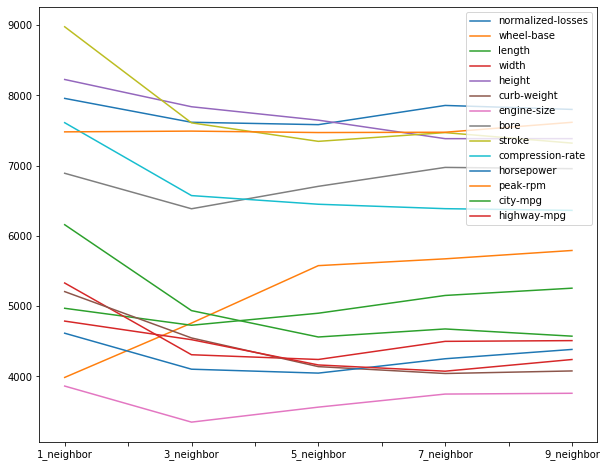

In [16]:
data.plot(figsize=(10,8))

Looks like a model with engine size as a single variable is the one reaching the lowest error point: let us retrain the model and plot results.

In [17]:
test_es_5n = knn_test_train_v2(train_col = ['engine-size'], target_col = 'price', df = normalized_cars, neighbors = 5, folds = 5)
normalized_cars['yhat_es'] = test_es_5n['yhat']


for key in ['rmse', 'r2']:
    print(f'{key.upper()} calculated per fold: {test_es_5n[key].round(2)}')
    print('Average', key, ':', test_es_5n[key].mean().round(2), '\n')

RMSE calculated per fold: [5100.71 2781.82 2745.32 3390.66 3789.57]
Average rmse : 3561.62 

R2 calculated per fold: [0.62 0.78 0.9  0.82 0.77]
Average r2 : 0.78 



Good stuff! `engine-size` looks like a better choice of a feature (vs `horsepower`) in predicting car prices. We have decreased the RMSE from ~4000 to 3561. To have a better understanding of how the various observations get distributed against the actual values, we can plot data into a scatter plot, and retrieve the R squared metric (basically, how well do we describe ou

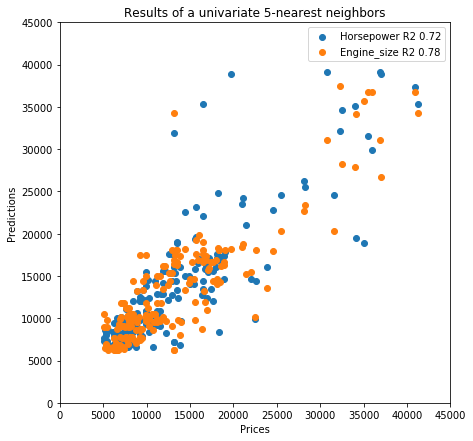

In [18]:
r2_hp = round(r2_score(normalized_cars['price'], normalized_cars['yhat_hp']),2)
r2_es = round(r2_score(normalized_cars['price'], normalized_cars['yhat_es']),2)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(y = normalized_cars['yhat_hp'], x = normalized_cars['price'])
ax.scatter(y = normalized_cars['yhat_es'], x = normalized_cars['price'])

ax.legend([f'Horsepower R2 {r2_hp}', f'Engine_size R2 {r2_es}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a univariate 5-nearest neighbors')
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

An important thing to note here is that we have different results in terms of R2 related to our first univariate model, trained on horsepower as a variable:  
- The 5-kfold evaluation (via `cross_val_score`) resulted in an average **R2 of 0.68**
- In the scatter plot above, r2 (calculated on the predicted values by `cross_val_predict`) resulted in a total of **0.72**.

This discrepancy is related to how the two methods work:
- `cross_val_score` returns the selected score metric (R2) once for each fold
- `cross_val_predict` returns fold predictions for each data point.

While the former method retrieves the average R2 for the output, the latter instead calculates the predictions for each value WHEN it is in the TEST fold (using all other k-1 folds for Training). This implies the likelihood of different results happening, as brilliantly explained in this well written [Stackoverflow answer](https://stackoverflow.com/questions/55009704/why-is-cross-val-predict-not-appropriate-for-measuring-the-generalisation-error?rq=1)
All in all, this does not move us away from the main concept: engine size is a better predictor of prices than horsepower. Let's now try to find out the best predictor features and use them for a multivariate model.

# Multivariate model


In [19]:
print('Best results order by decreasing error')
data.iloc[2].sort_values()

Best results order by decreasing error


engine-size          3561.62
horsepower           4046.09
curb-weight          4138.39
highway-mpg          4162.22
width                4240.20
city-mpg             4560.27
length               4898.86
wheel-base           5576.15
compression-rate     6450.18
bore                 6705.29
stroke               7345.71
peak-rpm             7471.00
normalized-losses    7583.34
height               7647.50
Name: 5_neighbor, dtype: float64

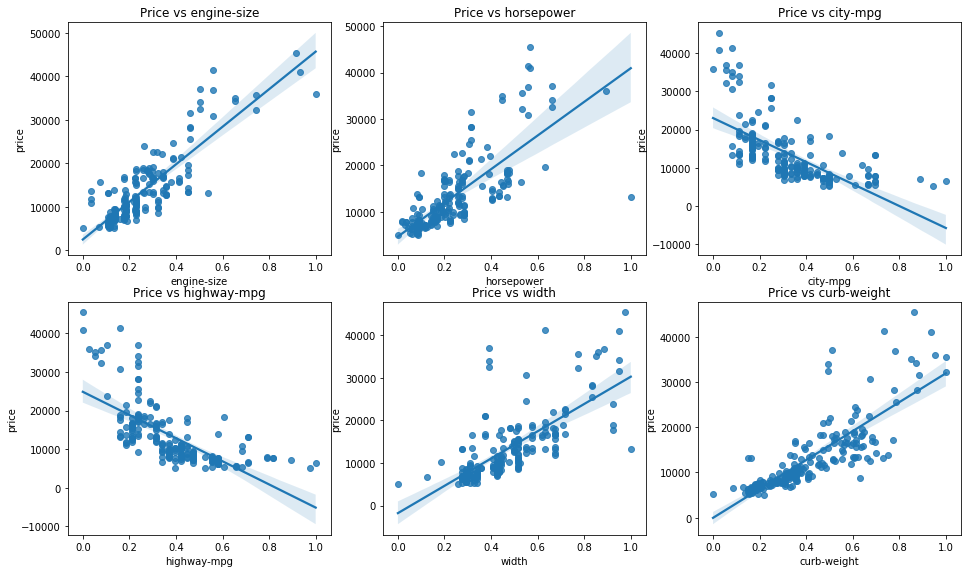

In [20]:
features = ['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'width','curb-weight']

#plot graphs onto a multifaced grid
plt.subplots(figsize=(16,30))
i=1
for col in features:
    plt.subplot(6,3,i)
    sns.regplot(x = col , y = 'price', data = normalized_cars)
    plt.title('Price vs '+ col)
    i+=1
    

All the predictors do share a decent degree of a relationship with price.  
Curiously, horsepower has a major outlier that makes it severly unbalanced: we should probably look at this observation to understand if there is a degree of data corruption, but for the time being we'll keep it as it is. Hence, we are now in a position to test a multivariate model using multiple parameters.

In [21]:
mv_results = knn_test_train_v2(normalized_cars, features, target_col = 'price', neighbors = 5)

print('RMSE calculated on each fold: ',mv_results['rmse'], '\nAverage RMSE: ', mv_results['rmse'].mean(), '\n')
print('R2 calculated on each fold: ',mv_results['r2'], '\nAverage r2: ', mv_results['r2'].mean())


RMSE calculated on each fold:  [5383.79221114 2486.65042787 2420.62766257 3454.73642907 3143.84682232] 
Average RMSE:  3377.9307105933135 

R2 calculated on each fold:  [0.57605477 0.82091498 0.92494541 0.80964549 0.83948508] 
Average r2:  0.7942091457744495


Super small increase here. We can try and tweak the results by using only the optimal features, or we can explore other options in the model, such as using a weighted approach that gives less value to observations which are farther away. See details on the [scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).


In [22]:
mv_results_w = knn_test_train_v2(normalized_cars, features, target_col = 'price', neighbors = 5, w = 'distance')

print('RMSE calculated on each fold: ',mv_results_w['rmse'], '\nAverage RMSE: ', mv_results_w['rmse'].mean(), '\n')
print('R2 calculated on each fold: ',mv_results_w['r2'], '\nAverage r2: ', mv_results_w['r2'].mean())


RMSE calculated on each fold:  [4922.13612082 2664.7424206  1887.68265605 2414.17143623 2518.0818439 ] 
Average RMSE:  2881.3628955184486 

R2 calculated on each fold:  [0.6456435  0.79434454 0.95435647 0.90704569 0.89702487] 
Average r2:  0.8396830111636218


Now this is interesting! The distance weighted approach is improving substantially the accuracy of a couple of the selected folds, resulting in a +6%~ improvement in R2, which we can now try and plot against the other univariate options we explored earlier.

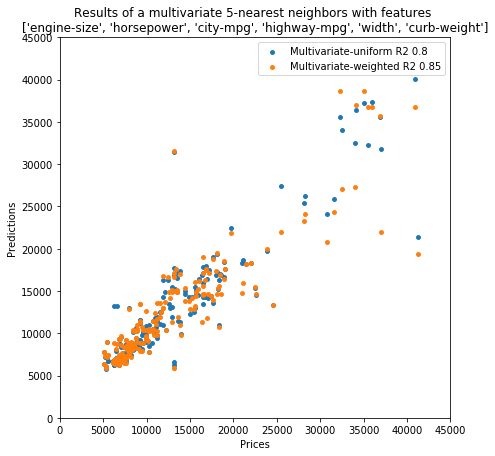

In [23]:
mv = mv_results['yhat']
mv_w = mv_results_w['yhat']
r2_mv = round(r2_score(normalized_cars['price'], mv),2)
r2_mv_w = round(r2_score(normalized_cars['price'], mv_w),2)
size = 15

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

#draw the three series of scatter plots
ax.scatter(y = mv_w, x = normalized_cars['price'], s = size)
ax.scatter(y = mv, x = normalized_cars['price'], s = size)

#style the plot
ax.legend([f'Multivariate-uniform R2 {r2_mv}', f'Multivariate-weighted R2 {r2_mv_w}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a multivariate 5-nearest neighbors with features \n{}'.format(features))
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

Let's now plot the results to check the amount of the residuals; we can perform this easily by calculating the difference between our predictions `mw_w` - the actual results, stored under the series `normalized_cars['price']`.  

This can be easily plotted with a scatter plot and a kdeplot, to understand both magnitude and distribution of errors.

Text(0.5, 1.0, 'Distribution of errors')

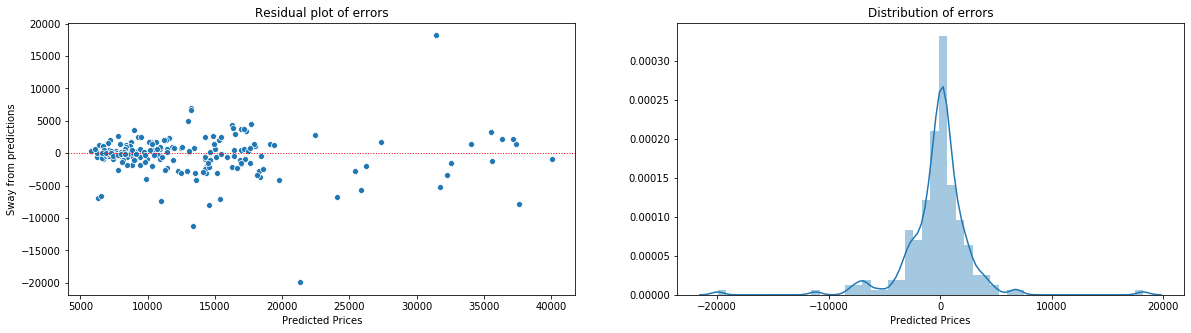

In [24]:
residuals = mv_w - normalized_cars['price']

fig, axes = plt.subplots(ncols=2, figsize=(20,5))
#prep first graph
sns.scatterplot(x = mv_w, y=(residuals), ax=axes[0])

#labeling
axes[0].set_xlabel('Predicted Prices')
axes[0].set_ylabel('Sway from predictions')
axes[0].set_title('Residual plot of errors')
axes[0].axhline(linewidth=1, color='r', linestyle = 'dotted')


#prep second graph
sns.distplot(mv_w - normalized_cars['price'], ax = axes[1])

axes[1].set_xlabel('Predicted Prices')
axes[1].set_title('Distribution of errors')




# Optimizing for features and k-neighbors
Now we can try to understand the best course of action to tune the number of parameters and the results. Hence we will:  
- Take the five best predictors with price
- Build combinations of features, to have list of best_two to best_five features
- Grid search for the optimal number of neighbors, going from 1 to 25, and check for the results yielding the lowest RMSE value.

In [25]:
best_features = data.iloc[2].sort_values()
labels = ['best_two', 'best_three', 'best_four', 'best_five']

#define a list of lists that gathers the best_n features name for each scenario
scenarios = []
for i in range(1,5):
    best_f = best_features.index[:i+1].tolist()
    scenarios.append(best_f)
    
scenarios

[['engine-size', 'horsepower'],
 ['engine-size', 'horsepower', 'curb-weight'],
 ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg'],
 ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']]

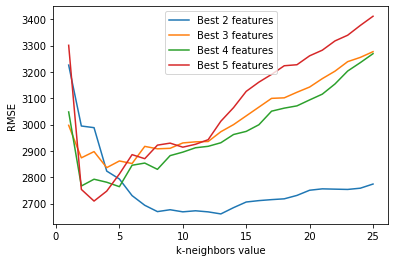

In [27]:
results = {}

for idx, scen in enumerate(scenarios):
    key = f'Best {idx+2} features' #loop starts at 0, but the first option is on two features
    results[key] = {}
    for k in range(1,26): #do a grid search using 1-25 nearest neighbors
        model_run = knn_test_train_v2(normalized_cars, scen, target_col = 'price', neighbors = k, folds = 5, w = 'distance')
        results[key][k] = model_run['rmse'].mean() #store the 


#retrieve results and prepare for plotting
#k are basically the labels: "best two features" etc 
#v are dictionaries with the structure {number_of_featurs: rmse}
for k,v in results.items():
    neighbors = list(v.keys()) 
    rmse = list(v.values()) 
    plt.plot(neighbors,rmse, label="{}".format(k))

plt.title('')
plt.xlabel('k-neighbors value')
plt.ylabel('RMSE')
plt.legend()

The optimal solution seem to be one that uses just the **best two features and 13 neighbors** - let's try to deploy this model and calculate the RMSE and the R2; we would expect to end with a slightly improved R2: and this is the case, with around and extra 1% in accuracy of predictions.  

In [28]:
best = knn_test_train_v2(normalized_cars, scenarios[0], target_col = 'price', neighbors = 13, w = 'distance')

print('RMSE calculated on each fold: ',best['rmse'], '\nAverage RMSE: ', best['rmse'].mean())
print('R2 calculated on each fold: ',best['r2'], '\nAverage r2: ', best['r2'].mean())


RMSE calculated on each fold:  [4327.34228773 1812.46458178 1695.90653376 2937.92360776 2531.34427159] 
Average RMSE:  2660.9962565234346
R2 calculated on each fold:  [0.72611032 0.90485875 0.96315953 0.86233792 0.8959373 ] 
Average r2:  0.8704807653424649


Out of curiosity, it's interesting to see how different the curves are with the usage of a non-weighted distance model. In this case, a best four with 3 neighbors is looking the best option - the error difference is not huge, yet is present.

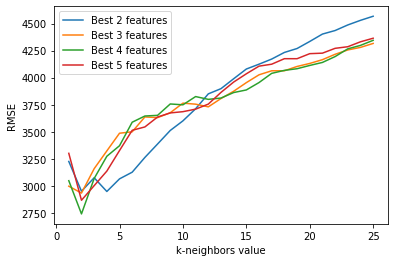

In [29]:
results = {}

for idx, scen in enumerate(scenarios):
    key = f'Best {idx+2} features' #loop starts at 0, but the first option is on two features
    results[key] = {}
    for k in range(1,26): #do a grid search using 1-25 nearest neighbors
        model_run = knn_test_train_v2(normalized_cars, scen, target_col = 'price', neighbors = k, folds = 5)
        results[key][k] = model_run['rmse'].mean() #store the 


#retrieve results and prepare for plotting
#k are basically the labels: "best two features" etc 
#v are dictionaries with the structure {number_of_featurs: rmse}
for k,v in results.items():
    neighbors = list(v.keys()) 
    rmse = list(v.values()) 
    plt.plot(neighbors,rmse, label="{}".format(k))

plt.xlabel('k-neighbors value')
plt.ylabel('RMSE')
plt.legend()

# Final considerations
- We tested a KNN nearest neighbors to predict car prices From a small dataset of 205 entries
- The dataset was very skewed in its price distribution, with underrepresented cars with price > 25k.  
This imbalance gave KNN a harder time in getting good results.

### Models characteristics and results
- We started with a baseline univariate model using 5 neighbors and `engine-size` as a feature.
- Given the imbalance of the distrtibution we have compensated the risk of a biased dataset by performing cross validation on multiple folds.
- We ended up with a *multivariate model* with *two features* weighted by *distance*.
- From a starting ~0.78 R2 accuracy, we got to 0.87 cross-validated R2, with a tendence for the model to underestimate prices - this is coherent with the data imbalance, where more cars lowly priced are translated in more neighbors from which to infer a (lower) price.

### Suggested next steps
- Gather more data for high-end priced cars
- Test other models